## Ejercicio hiperparametrización breast cancer de sklearn

1. Carga el dataset [breast_cancer de `sklearn`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html)
2. Prueba al menos 5 modelos diferentes de clasificación y aplica un GridSearchCV mediante Pipelines. Aplica también un RandomizedSearchCV.
3. Conclusiones. Guarda el modelo final en un archivo con pickle.

In [30]:
# Load libraries
import pickle
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn import svm
# Set random seed
#np.random.seed(42)

In [31]:
from sklearn.datasets import load_breast_cancer

cancer_data = load_breast_cancer()
df_cancer = pd.DataFrame(data=cancer_data.data, columns=cancer_data.feature_names)
df_cancer['Diagnosis'] = cancer_data.target # Esto para sacar los nombres de las columnas.
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [32]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [33]:
df_cancer.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


C:\Users\mikel\AppData\Local\Temp\ipykernel_26048\144891757.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['Diagnosis'] = df_cancer['Diagnosis']  # Añadir la columna 'Diagnosis'


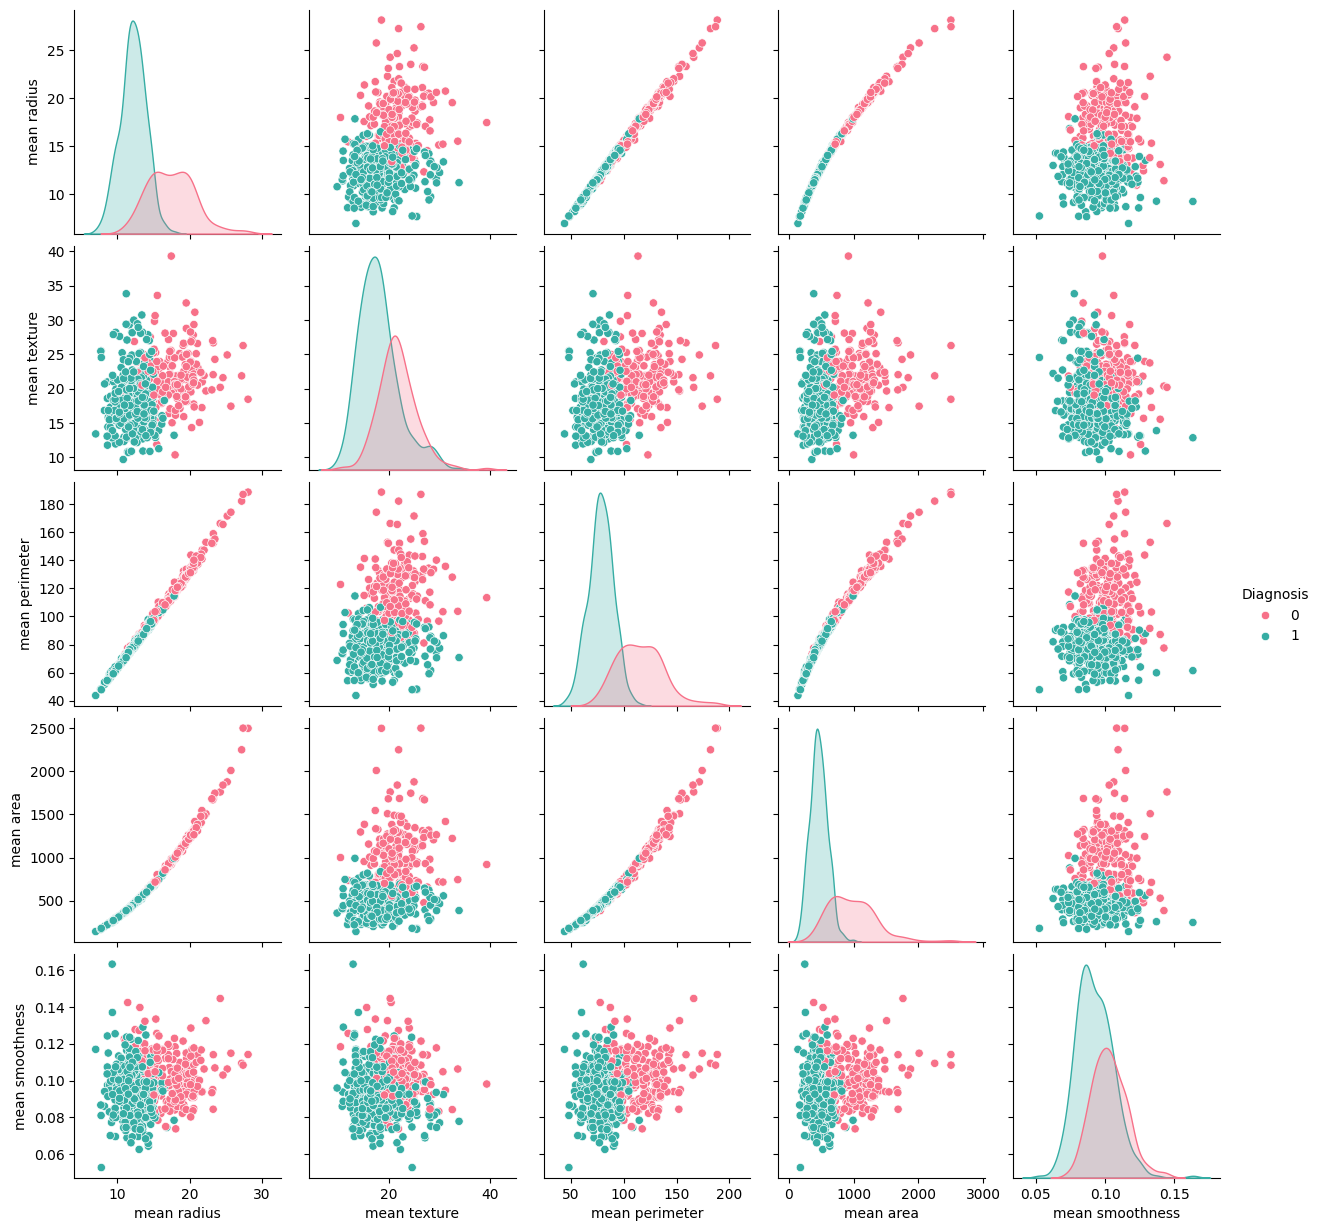

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar un subconjunto de columnas para el pairplot (opcional, para mayor claridad)
subset_columns = df_cancer.columns[:5]  # Por ejemplo, las primeras 5 columnas
df_subset = df_cancer[subset_columns]
df_subset['Diagnosis'] = df_cancer['Diagnosis']  # Añadir la columna 'Diagnosis'

# Crear el pairplot, coloreando por 'Diagnosis'
sns.pairplot(df_subset, hue='Diagnosis', diag_kind='kde', palette='husl')

# Mostrar el gráfico
plt.show()

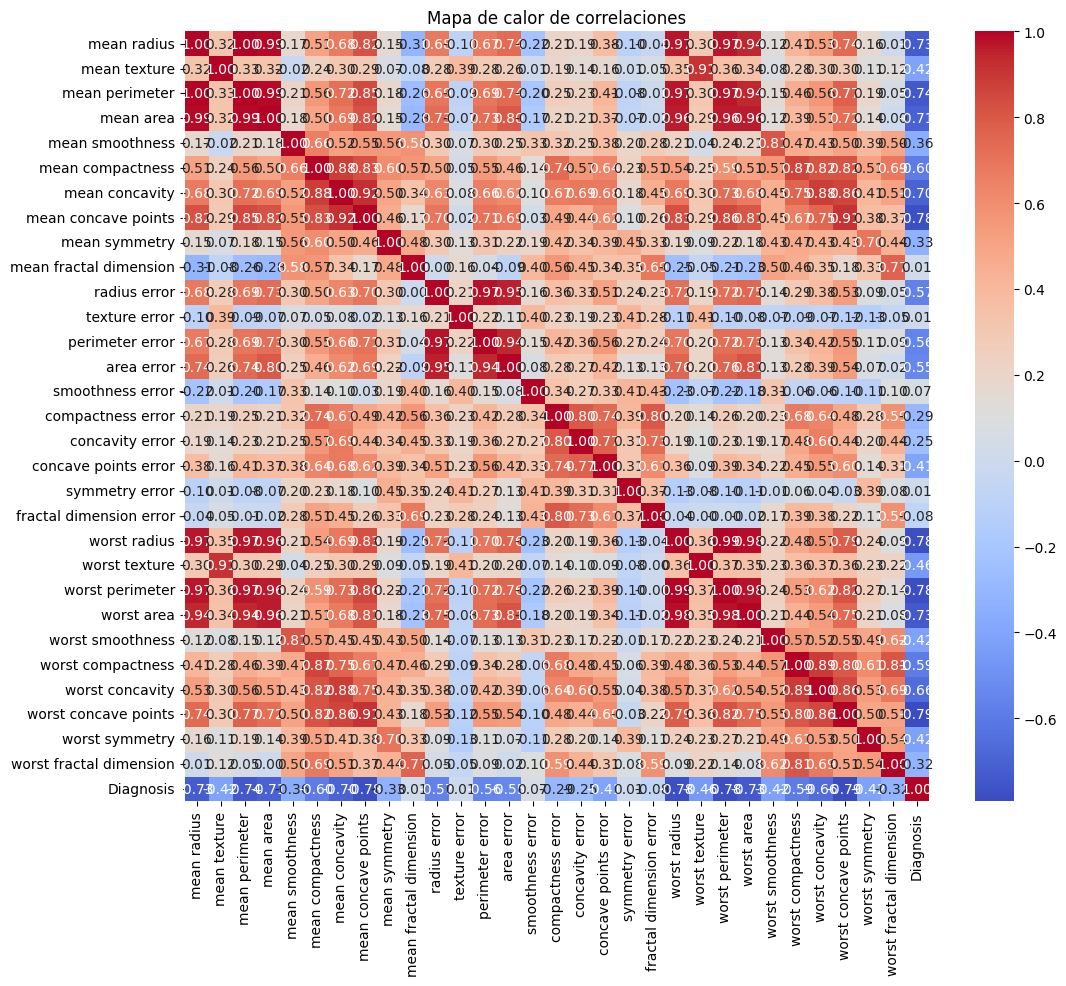

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
correlation_matrix = df_cancer.corr()

# Crear el heatmap con Seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)

# Mostrar el gráfico
plt.title("Mapa de calor de correlaciones")
plt.show()


In [36]:
# Separar X y y
X = df_cancer.drop(columns=['Diagnosis'])  # Eliminar la columna 'Diagnosis' para X
y = df_cancer['Diagnosis']  # Usar 'Diagnosis' como y

In [37]:
from sklearn.model_selection import train_test_split
# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

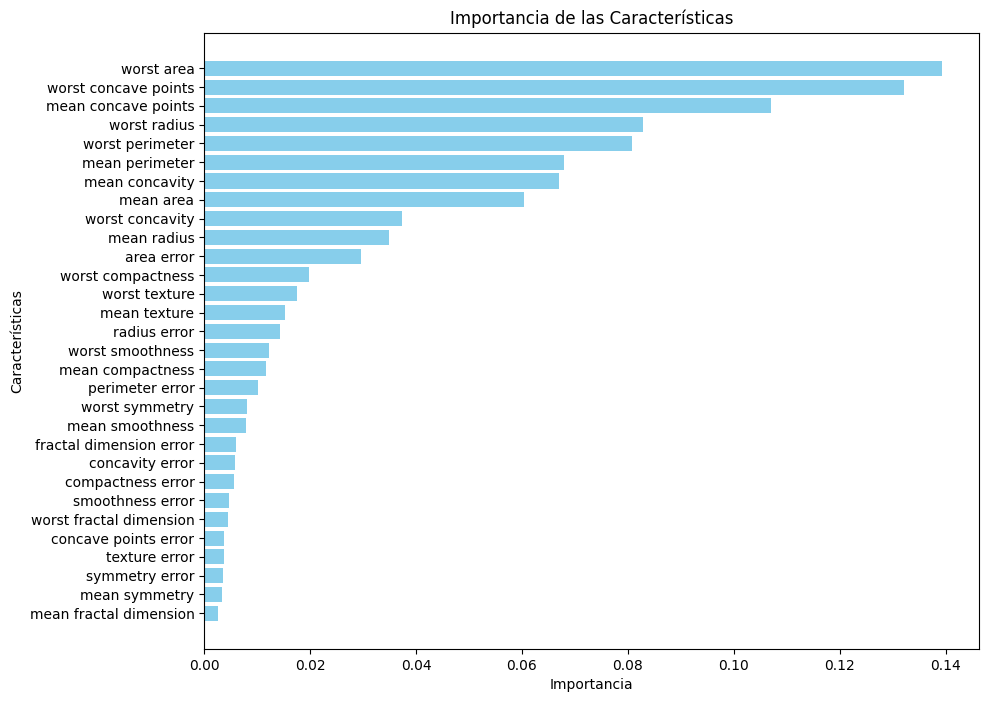

In [38]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

# Entrenar un modelo RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# Obtener las importancias de las características
feature_importances = rf_model.feature_importances_

# Crear un DataFrame para organizar las importancias con sus nombres
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Visualizar las importancias
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de las Características')
plt.gca().invert_yaxis()  # Invertir el eje y para mayor claridad
plt.show()


In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest # basado en p-values
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

import pandas as pd
import numpy as np

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [40]:
reg_log = Pipeline(steps = [
    ("imputer", SimpleImputer()),
    ("scaler", StandardScaler()),
    ("reglog", LogisticRegression())
])
reg_log_param = {
    "imputer__strategy": ['mean', 'median'],
#    "reglog__penalty": ['l1', 'l2'],
    "reglog__penalty": ['l2'],
    "reglog__C": np.logspace(0, 4, 10)
}

In [41]:

rand_forest = RandomForestClassifier()
rand_forest_param = {
    "n_estimators": [10, 100, 1000],
    "max_features": [1,2,3]
}


svm = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("selectkbest", SelectKBest()),
    ("svm", SVC())
])


svm_param = {
    'selectkbest__k': [2, 3, 4],
    'svm__kernel': ['linear', 'rbf', 'sigmoid', 'poly'],
    'svm__C': [0.001, 0.1, 0.5, 1, 5, 10, 100],
    'svm__degree': [1,2,3,4],
    'svm__gamma': ['scale', 'auto']
}


gs_reg_log = GridSearchCV(reg_log,
                         reg_log_param,
                         cv = 10,
                         scoring = 'accuracy',
                         verbose = 1,
                         n_jobs = -1)

gs_rand_forest = GridSearchCV(rand_forest,
                         rand_forest_param,
                         cv = 10,
                         scoring = 'accuracy',
                         verbose = 1,
                         n_jobs = -1)

gs_svm = GridSearchCV(svm,
                         svm_param,
                         cv = 10,
                         scoring = 'accuracy',
                         verbose = 1,
                         n_jobs = -1)

grids = {"gs_reg_log": gs_reg_log,
        "gs_rand_forest": gs_rand_forest,
        "gs_svm": gs_svm}

In [42]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
for nombre, grid_search in grids.items():
    grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
Fitting 10 folds for each of 9 candidates, totalling 90 fits
Fitting 10 folds for each of 672 candidates, totalling 6720 fits


In [44]:
print(gs_reg_log.best_score_)
print(gs_reg_log.best_params_)
print(gs_reg_log.best_estimator_)
print(gs_reg_log.best_estimator_['reglog'])

0.9735748792270531
{'imputer__strategy': 'mean', 'reglog__C': np.float64(1.0), 'reglog__penalty': 'l2'}
Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('reglog', LogisticRegression(C=np.float64(1.0)))])
LogisticRegression(C=np.float64(1.0))


In [45]:
print(gs_rand_forest.best_score_)
print(gs_rand_forest.best_params_)
print(gs_rand_forest.best_estimator_)

0.9692270531400966
{'max_features': 3, 'n_estimators': 1000}
RandomForestClassifier(max_features=3, n_estimators=1000)


In [46]:
print(gs_svm.best_score_)
print(gs_svm.best_params_)
print(gs_svm.best_estimator_)
print(gs_svm.best_estimator_['svm'])

0.9493719806763286
{'selectkbest__k': 4, 'svm__C': 0.5, 'svm__degree': 1, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
Pipeline(steps=[('scaler', StandardScaler()), ('selectkbest', SelectKBest(k=4)),
                ('svm', SVC(C=0.5, degree=1))])
SVC(C=0.5, degree=1)


In [47]:
best_grids = [(i, j.best_score_) for i, j in grids.items()]

best_grids = pd.DataFrame(best_grids, columns=["Grid", "Best score"]).sort_values(by="Best score", ascending=False)
best_grids

,Grid,Best score
0,gs_reg_log,0.973575
1,gs_rand_forest,0.969227
2,gs_svm,0.949372


In [48]:
gs_svm.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('selectkbest', SelectKBest(k=4)),
                ('svm', SVC(C=0.5, degree=1))])

In [49]:
preds = gs_svm.best_estimator_.predict(X_test)
accuracy_score(y_test, preds)

0.956140350877193

In [50]:
gs_reg_log.best_estimator_

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('reglog', LogisticRegression(C=np.float64(1.0)))])

In [51]:
preds = gs_reg_log.best_estimator_.predict(X_test)
accuracy_score(y_test, preds)

0.9736842105263158

In [52]:
gs_svm.best_estimator_['svm']

SVC(C=0.5, degree=1)

In [53]:
preds = gs_svm.best_estimator_.predict(X_test)
accuracy_score(y_test, preds)

0.956140350877193

In [54]:
gs_svm.best_estimator_['svm']

SVC(C=0.5, degree=1)

In [55]:
# El mejor modelo ha sido
best_model = gs_reg_log.best_estimator_
best_model.score(X_test, y_test)

0.9736842105263158

In [56]:
gs_reg_log.best_params_

{'imputer__strategy': 'mean',
 'reglog__C': np.float64(1.0),
 'reglog__penalty': 'l2'}

In [57]:
# El mejor modelo ha sido
best_model = gs_reg_log.best_estimator_
best_model.score(X_test, y_test)

0.9736842105263158

In [58]:
gs_reg_log.best_estimator_

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('reglog', LogisticRegression(C=np.float64(1.0)))])

In [59]:
import pickle

filename = 'finished_model'

with open(filename, 'wb') as archivo_salida:
    pickle.dump(best_model, archivo_salida)

In [60]:
with open(filename, 'rb') as archivo_entrada:
    modelo_importado = pickle.load(archivo_entrada)

In [61]:
modelo_importado.score(X_test, y_test)*100

97.36842105263158

In [62]:
modelo_importado.predict(X_test)

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0])

In [63]:
modelo_importado

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('reglog', LogisticRegression(C=np.float64(1.0)))])

## RandomSearch

In [65]:
np.logspace(0, 4, 10)

array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04])

In [66]:
from sklearn.model_selection import RandomizedSearchCV

rand_forest = RandomForestClassifier()
rand_forest_param = {
    "n_estimators": [10, 100, 1000],
    "max_features": [1,2,3]
}


svm = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("selectkbest", SelectKBest()),
    ("svm", SVC())
])


svm_param = {
    'selectkbest__k': [2, 3, 4],
    'svm__kernel': ['linear', 'rbf', 'sigmoid', 'poly'],
    'svm__C': [0.001, 0.1, 0.5, 1, 5, 10, 100],
    'svm__degree': [1,2,3,4],
    'svm__gamma': ['scale', 'auto']
}



reg_log = Pipeline(steps=[
                          ("imputer",SimpleImputer()),
                          ("scaler",StandardScaler()),
                          ("reglog",LogisticRegression())
                         ])

reg_log_param = {    
                 "imputer__strategy": ['mean', 'median', 'most_frequent'],
#                 "reglog__penalty": ["l1","l2"], 
                 "reglog__penalty": ["l2"], 
                 "reglog__C": np.logspace(0, 4, 10)
                }


search = RandomizedSearchCV(reg_log,
                           reg_log_param,
                           n_iter = 50,
                           scoring='accuracy',
                           n_jobs=-1,
                           cv=10)

# execute search
result = search.fit(X_train, y_train)

# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)
print('Best Estimator: %s' % result.best_estimator_)

C:\Users\mikel\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 30 is smaller than n_iter=50. Running 30 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Score: 0.9735748792270531
Best Hyperparameters: {'reglog__penalty': 'l2', 'reglog__C': np.float64(1.0), 'imputer__strategy': 'mean'}
Best Estimator: Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('reglog', LogisticRegression(C=np.float64(1.0)))])


In [67]:
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)
print('Best Estimator: %s' % result.best_estimator_)

Best Score: 0.9735748792270531
Best Hyperparameters: {'reglog__penalty': 'l2', 'reglog__C': np.float64(1.0), 'imputer__strategy': 'mean'}
Best Estimator: Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('reglog', LogisticRegression(C=np.float64(1.0)))])
